# Importação das Bibliotecas e Carregamento do Dataset

Nesta etapa inicial:

- Importamos as bibliotecas necessárias para:
  - Manipulação de dados (`pandas`, `numpy`)
  - Visualização gráfica (`matplotlib`, `seaborn`)

- Carregamos o dataset bruto (`application_train.csv`), que contém os dados históricos de clientes e suas informações de crédito.

Esse é o dataset principal do problema de risco de crédito.


In [98]:
#import necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df_train = pd.read_csv('../data/raw/application_train.csv')
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Análise de Valores Nulos

Aqui analisamos a quantidade e o percentual de valores ausentes em cada coluna.

Etapas realizadas:

1. Contagem total de valores nulos por coluna
2. Cálculo do percentual de valores nulos
3. Criação de uma tabela consolidada
4. Filtragem apenas das colunas que possuem valores ausentes

Essa análise é fundamental porque:

- Muitas variáveis financeiras possuem dados incompletos
- Alta porcentagem de nulos pode comprometer o modelo
- Ajuda a decidir quais colunas remover ou tratar


In [100]:

nulos = df_train.isnull().sum().sort_values(ascending=False)
nulos_percentual = 100 * nulos / len(df_train)
tabela_nulos = pd.concat([nulos, nulos_percentual], axis=1)
tabela_nulos.columns = ['Total de Valores Nulos', 'Percentual de Valores Nulos (%)']
tabela_nulos = tabela_nulos[tabela_nulos['Total de Valores Nulos'] > 0]
tabela_nulos

,Total de Valores Nulos,Percentual de Valores Nulos (%)
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
...,...,...
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650


# Distribuição da Variável Alvo (TARGET)

Nesta etapa analisamos:

- Quantidade absoluta de clientes que:
  - 0 → Pagaram em dia
  - 1 → Inadimplentes

- Percentual de cada classe

Também visualizamos a distribuição com um gráfico de contagem.

Essa análise é essencial para identificar se o problema é desbalanceado — algo muito comum em modelos de crédito.


In [101]:
contagem_target = df_train['TARGET'].value_counts()
contagem_target_percent = df_train['TARGET'].value_counts(normalize=True) * 100
print(contagem_target)
print(contagem_target_percent)

TARGET
0    282686
1     24825
Name: count, dtype: int64
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


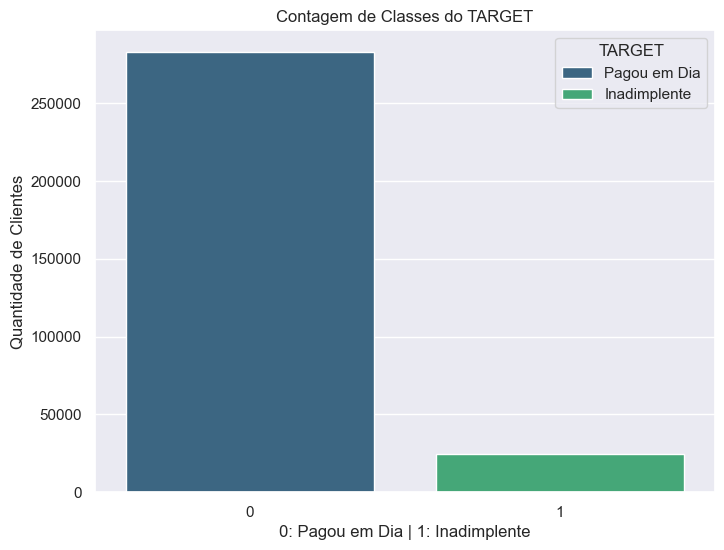

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TARGET', data=df_train , palette='viridis' , hue='TARGET')
plt.title('Contagem de Classes do TARGET')
plt.xlabel('0: Pagou em Dia | 1: Inadimplente')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='TARGET', labels=['Pagou em Dia', 'Inadimplente'])
plt.show()


# Inadimplência por Tipo de Contrato

Aqui avaliamos a relação entre:

- Tipo de contrato (Cash loans, Revolving loans, etc.)
- Status de inadimplência

O objetivo é identificar:

- Se determinado tipo de contrato apresenta maior risco
- Possíveis padrões comportamentais

Esse tipo de análise gera insights estratégicos para políticas de concessão.


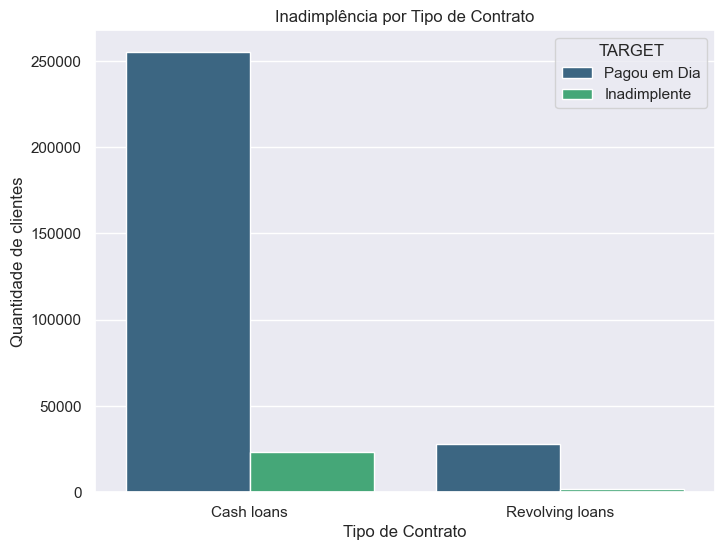

In [103]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='NAME_CONTRACT_TYPE', palette='viridis' , hue='TARGET')
plt.title('Inadimplência por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade de clientes')
plt.legend(title='TARGET', labels=['Pagou em Dia', 'Inadimplente'])
plt.show()

# Inadimplência por Gênero

Analisamos a distribuição de inadimplência por gênero.

Objetivo:

- Identificar possíveis diferenças de comportamento de pagamento
- Entender padrões estatísticos no dataset



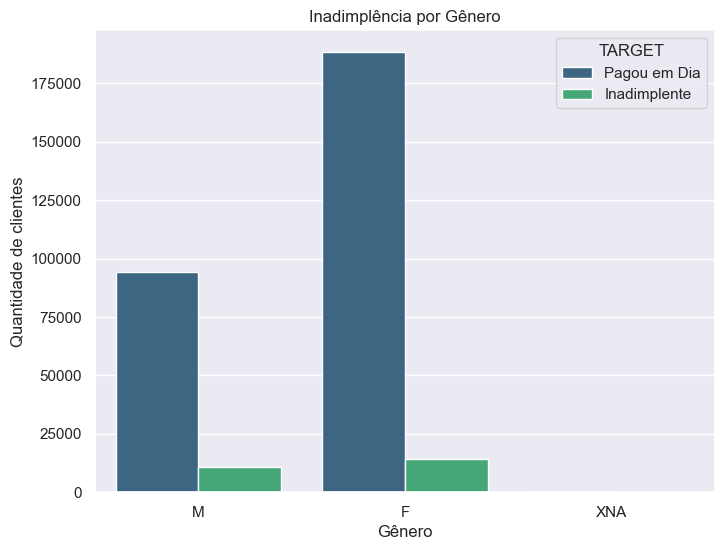

In [104]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='CODE_GENDER', palette='viridis' , hue='TARGET')
plt.title('Inadimplência por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de clientes')
plt.legend(title='TARGET', labels=['Pagou em Dia', 'Inadimplente'])
plt.show()

# Distribuição de Idade dos Clientes

Criamos uma nova variável convertendo:

- `DAYS_BIRTH` → Idade em anos

Depois analisamos a distribuição da idade separada por:

- Clientes adimplentes
- Clientes inadimplentes

Objetivo:

- Verificar se a idade influencia o risco de crédito
- Identificar faixas etárias com maior propensão à inadimplência


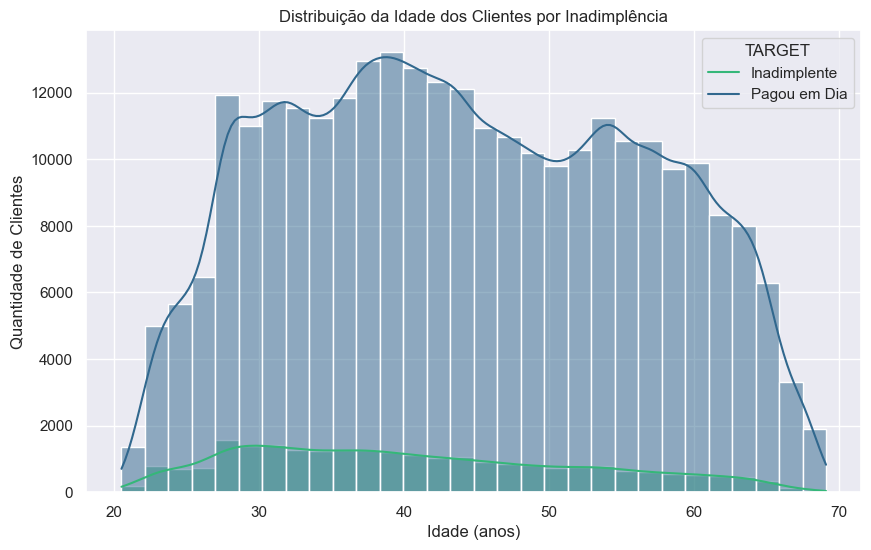

In [121]:
df_train['DAYS_BIRTH_YEARS'] = df_train['DAYS_BIRTH'].abs() / 365
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='DAYS_BIRTH_YEARS', hue='TARGET', palette='viridis', bins=30, kde=True)
plt.title('Distribuição da Idade dos Clientes por Inadimplência')
plt.xlabel('Idade (anos)')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='TARGET', labels=['Inadimplente', 'Pagou em Dia'])
plt.show()

# Correlação com a Variável Alvo

Calculamos a correlação entre todas as variáveis numéricas e o TARGET.

Isso permite:

- Identificar variáveis com maior relação linear com inadimplência
- Entender possíveis drivers de risco
- Direcionar feature engineering

A correlação é uma primeira aproximação para entender relevância estatística.


In [ ]:
correlacao = df_train.corr(numeric_only=True)['TARGET'].sort_values().round(2)
correlacao

# Remoção de Variáveis com Alto Percentual de Valores Nulos

Definimos um limite de 50%:

- Colunas com mais de 50% de valores ausentes são removidas

Motivação:

- Variáveis com muitos dados faltantes podem:
  - Introduzir ruído
  - Aumentar complexidade do modelo
  - Prejudicar performance

Após a remoção, comparamos:

- Número de colunas antes
- Número de colunas depois


In [141]:
limite = 50
colunas_remover = tabela_nulos[tabela_nulos['Percentual de Valores Nulos (%)'] > limite].index.tolist()
print(f'Colunas a serem removidas (mais de {limite}% de valores nulos):')
df_train_limpo = df_train.drop(columns=colunas_remover)
print(f'Número de colunas antes da remoção: {df_train.shape[1]}')
print(f'Número de colunas após a remoção: {df_train_limpo.shape[1]}')

Colunas a serem removidas (mais de 50% de valores nulos):
Número de colunas antes da remoção: 123
Número de colunas após a remoção: 82


# Salvamento do Dataset Processado

Após a remoção das colunas problemáticas, salvamos o dataset tratado na pasta `processed`.

Esse arquivo será utilizado nas próximas etapas:

- Feature Engineering
- Modelagem
- Avaliação

Separar dados brutos e processados é uma boa prática de organização em projetos de Data Science.


In [142]:
df_train_limpo.to_csv('../data/processed/application_train_limpo.csv', index=False)